###

### Embedding articles

In [3]:
import torch
from transformers import AutoModel
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# load model and tokenizer
# tokenizer = AutoModel.from_pretrained('xlnet-base-cased')
# model = AutoModel.from_pretrained('xlnet-base-cased')
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [4]:
print(torch.__version__)  
print(torch.cuda.current_device())  


2.0.1+cu117
0


In [5]:
def embed_article(article_text):
    # inputs = tokenizer(article_text, truncation=True, padding=True, max_length=1024)
    # inputs = {key: value.to(device) for key, value in inputs.items()}

    # with torch.no_grad():
    #     output = model(**inputs)
    
    # # extract CLS token (index 0) as the article's embedding
    # # article_embedding = output.last_hidden_state[:, 0, :].squeeze()

    # # mean pool the tokens to get the article embedding
    # article_embedding = output.last_hidden_state.mean(dim=1).squeeze()

    article_embedding = model.encode(article_text, convert_to_tensor=True)
    return article_embedding


Using Tfidf might be an option

In [6]:
tfidf_vectorizer = TfidfVectorizer()

Playing around with cosine similarities

In [7]:
article_1 =  """
The Rise of Artificial Intelligence in Healthcare

Artificial Intelligence (AI) has made significant strides in various industries, and healthcare is no exception. AI's ability to analyze large amounts of data, identify patterns, and make predictions is revolutionizing how healthcare providers diagnose, treat, and manage patients. From predictive analytics to personalized medicine, AI is enhancing the quality of care and improving patient outcomes.

The healthcare industry is experiencing a paradigm shift with the integration of Artificial Intelligence (AI) technologies. AI has already started to impact various aspects of healthcare, including diagnostics, treatment planning, and patient care. One of the most prominent uses of AI is in the field of medical imaging. Algorithms trained on vast datasets of medical images can detect anomalies such as tumors, fractures, or other conditions with high accuracy. This enables healthcare providers to make quicker and more accurate diagnoses, improving patient outcomes.

In addition to medical imaging, AI is also playing a significant role in predictive analytics. By analyzing large datasets of patient records, AI can predict health risks, track disease progression, and even suggest personalized treatment plans. For instance, AI algorithms can analyze data from wearables to monitor chronic conditions like diabetes and heart disease in real-time, enabling doctors to intervene earlier and prevent complications.

AI is also improving the efficiency of healthcare systems. Automating administrative tasks, such as scheduling and billing, frees up valuable time for healthcare professionals to focus on patient care. Moreover, AI-driven chatbots are assisting patients with appointment scheduling, medication reminders, and answering common health-related questions, improving patient engagement and satisfaction.

However, the adoption of AI in healthcare is not without its challenges. Data privacy, security, and ethical concerns are some of the obstacles that need to be addressed. AI algorithms rely on vast amounts of data, and ensuring that this data is securely stored and used responsibly is critical. Additionally, there are concerns about bias in AI models, which could lead to unequal care for certain patient groups.

Despite these challenges, the potential of AI in healthcare is immense. From early disease detection to improving patient care and reducing healthcare costs, AI is set to play a transformative role in the healthcare industry. As technology continues to evolve, it is expected that AI will become an indispensable tool for healthcare providers and patients alike.
"""

article_2 = """
The Importance of Renewable Energy

The global energy landscape is undergoing a major transformation. As concerns about climate change grow, there is an increasing push for renewable energy sources. This shift away from fossil fuels is driven by the need to reduce carbon emissions, combat global warming, and promote sustainability. Renewable energy sources such as solar, wind, hydroelectric, and geothermal energy offer the potential to power the world without relying on finite resources.

Renewable energy has become a critical factor in the fight against climate change. Over the past few decades, the adoption of renewable energy has been accelerating due to the advancements in technology, declining costs, and growing awareness about environmental sustainability. Solar energy, for instance, has witnessed a significant drop in costs, making it more accessible for both individuals and large corporations. Wind energy, too, has seen an increase in investment and capacity worldwide. Hydroelectric energy remains one of the largest contributors to the renewable energy mix, providing a substantial portion of the electricity in many countries. Moreover, geothermal energy is becoming more viable as technology improves and the demand for clean energy grows.

One of the key benefits of renewable energy is that it is abundant and sustainable. Unlike fossil fuels, which are finite and contribute to pollution, renewable energy sources are available in virtually unlimited quantities. Solar energy can be harnessed from the sun, wind energy from the atmosphere, and geothermal energy from the earth's heat. These sources do not produce harmful emissions, which makes them crucial for reducing global carbon footprints.

While renewable energy offers immense potential, challenges remain. Intermittency, storage, and grid integration are significant hurdles that need to be addressed. Solar and wind energy production is intermittent because it depends on weather conditions, and this inconsistency can affect the reliability of power generation. However, ongoing advancements in energy storage technology are helping mitigate these issues.

In conclusion, renewable energy is an essential part of the future energy mix. It offers numerous environmental and economic benefits, and while there are challenges to overcome, the continued development of renewable energy technologies is critical for a sustainable future.
"""

article_3 = """
The Future of Clean Energy

As the world continues to grapple with the effects of climate change, the transition to clean energy is more critical than ever. Clean energy, which refers to energy produced from renewable sources that do not release harmful pollutants, offers an essential solution to reducing global carbon emissions and mitigating environmental damage. With increasing technological advancements and declining costs, clean energy is becoming more accessible, reliable, and economically feasible.

Solar energy is one of the most promising forms of clean energy. Over the past decade, solar panels have become significantly cheaper and more efficient. With innovations in photovoltaic technology, solar energy has the potential to power homes, businesses, and even entire cities. Countries such as Germany and China have made significant investments in solar infrastructure, and the results are evident in the growing number of solar-powered facilities worldwide.

Wind energy is another key player in the clean energy revolution. Offshore and onshore wind farms are being built at an unprecedented rate, and wind energy now accounts for a large portion of global electricity generation. The efficiency of wind turbines has increased dramatically, allowing wind power to compete with traditional energy sources in terms of cost and reliability. Additionally, wind energy has the advantage of being scalable, with both small and large installations available to meet different energy needs.

Hydropower, although one of the oldest sources of renewable energy, continues to be a vital part of the global clean energy mix. Dams and water turbines harness the energy of moving water to generate electricity, providing a reliable and consistent source of power. However, the environmental impact of large-scale hydropower projects, such as habitat disruption and water usage, must be carefully managed to ensure sustainability.

Geothermal energy is another promising clean energy source, tapping into the heat stored beneath the Earth's surface. While not as widely used as solar or wind energy, geothermal power plants are emerging as a sustainable and efficient way to generate electricity in certain regions. Countries like Iceland and the Philippines have been at the forefront of geothermal energy development.

Despite the rapid growth of clean energy, challenges remain. The intermittency of solar and wind energy, for example, means that energy storage technologies must advance to ensure a steady and reliable energy supply. Moreover, the transition to clean energy requires substantial investments in infrastructure, technology, and workforce training.

The future of clean energy looks promising, with continued innovation and expansion. Governments, businesses, and individuals all have a role to play in supporting the transition to a low-carbon future. By investing in clean energy solutions, we can reduce greenhouse gas emissions, combat climate change, and create a more sustainable and equitable world for future generations.
"""

article_4 = """
The Growing Role of Renewable Energy in Global Power Generation

Renewable energy is rapidly becoming the cornerstone of the global energy system. As countries strive to reduce their reliance on fossil fuels and curb carbon emissions, renewable sources like wind, solar, and hydroelectric power are leading the charge toward a more sustainable future. With technological innovations, cost reductions, and a heightened focus on climate change, the use of renewable energy is growing faster than ever before.

Wind energy has seen remarkable growth in recent years. Advances in turbine technology have increased their efficiency, and large-scale wind farms are now being deployed across the world. Offshore wind energy is particularly promising, with nations like the United Kingdom and Denmark leading the way in constructing offshore wind farms. Wind energy is now one of the fastest-growing sources of electricity generation, and it continues to expand as both onshore and offshore wind installations increase.

Solar energy, too, has emerged as a key player in the global renewable energy landscape. The cost of solar photovoltaic (PV) panels has dropped dramatically in the last decade, making solar power more affordable and accessible to both consumers and businesses. Countries such as China, the United States, and India have made substantial investments in solar energy, leading to a significant increase in solar power generation worldwide. In addition, innovations in energy storage technology, such as improved battery storage systems, are helping address the intermittency of solar power, making it a more reliable source of energy.

Hydropower remains one of the largest contributors to renewable energy worldwide. Dams, water turbines, and run-of-river systems harness the power of moving water to generate electricity. Hydropower plants have been in operation for over a century, and their continued role in power generation highlights their reliability and efficiency. While large hydropower projects have been met with some environmental concerns, such as ecosystem disruption and water management issues, smaller-scale hydropower systems are gaining traction as a more sustainable option.

Geothermal energy, while less widespread, is another renewable resource that offers significant potential. Countries like Iceland and the Philippines have tapped into the Earth's heat to provide a consistent and reliable source of energy. Geothermal plants can operate 24/7, providing baseload power without the need for storage solutions. As drilling technology improves, the viability of geothermal energy continues to expand, especially in areas with high geothermal potential.

The transition to renewable energy is not without challenges, however. Intermittency in solar and wind power, the need for energy storage, and the integration of renewable energy into existing grids are all hurdles that need to be overcome. Governments around the world are working to address these challenges by implementing supportive policies, investing in research and development, and encouraging private sector innovation.

In conclusion, renewable energy is playing an increasingly important role in global power generation. As technology continues to improve and costs continue to fall, renewable energy will undoubtedly become a dominant force in the fight against climate change. The future of global energy is undoubtedly green, and the continued growth of renewable energy will be key to a sustainable and low-carbon future.
"""


In [8]:
embedding_1 = embed_article(article_1)

embedding_2 = embed_article(article_2)

embedding_3 = embed_article(article_3)

embedding_4 = embed_article(article_4)

articles = [article_1, article_2]
tfidf_matrix = tfidf_vectorizer.fit_transform(articles)

cos_sim_12 = torch.nn.functional.cosine_similarity(embedding_1, embedding_2, dim=0, eps=1e-8)
cos_sim_23 = torch.nn.functional.cosine_similarity(embedding_2, embedding_3, dim=0, eps=1e-8)
cos_sim_24 = torch.nn.functional.cosine_similarity(embedding_2, embedding_4, dim=0, eps=1e-8)

print('cosine similarity between article 1 and 2: ', cos_sim_12 )
print('cosine similarity between article 2 and 3: ', cos_sim_23 )
print('cosine similarity between article 2 and 4: ', cos_sim_24 )

# similarity_matrix = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
# print('cosine similarity: ', similarity_matrix[0][0] )

cosine similarity between article 1 and 2:  tensor(0.1061, device='cuda:0')
cosine similarity between article 2 and 3:  tensor(0.7385, device='cuda:0')
cosine similarity between article 2 and 4:  tensor(0.7631, device='cuda:0')


### SVM

In [9]:
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\tanxe\\Programming\\ML\\WORK\\classifier\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])
filtered_df = df
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Stock' or x == 'Finance' else 0)
df_cleaned = filtered_df.dropna(subset=['content'])
balanced_df = df_cleaned
balanced_df

# filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

# filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
# df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
# df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
# df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
# balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)

,article_id,source_name,title,description,content,category,full_content,relevant
0,89541,International Business Times,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,0
1,89542,Prtimes.jp,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,0
2,89543,VOA News,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,0
3,89545,The Indian Express,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,0
4,89547,The Times of Israel,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",Nepal,NaN,0
...,...,...,...,...,...,...,...,...
105370,781108,The Indian Express,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,0
105371,781129,Forbes,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,0
105372,781235,NPR,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,0
105373,781240,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,0


In [10]:
balanced_df_24k = balanced_df[balanced_df['source_name'].isin(["ETF Daily News", "The Times of India"])]
balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)
balanced_df_24k = balanced_df_24k.dropna(subset=['content'])
balanced_df_24k['relevant'].value_counts()

C:\Users\tanxe\AppData\Local\Temp\ipykernel_10492\2424080986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)


relevant
0    20757
1     3503
Name: count, dtype: int64

In [11]:
balanced_df_24k['embeddings'] = balanced_df_24k['content'].apply(embed_article)

In [50]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(balanced_df_24k, test_size=0.4, random_state=42, stratify=balanced_df_24k['relevant'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['relevant'])

train_df['relevant'].value_counts()

relevant
0    12454
1     2102
Name: count, dtype: int64

In [63]:
from sklearn.svm import SVC
import cupy as cp
import numpy as np

X_train = torch.stack(train_df['embeddings'].tolist()).cpu().numpy().astype('float32')
y_train = np.array(train_df['relevant'].to_list(), dtype=np.int32)

model = SVC(C=2.0, kernel='rbf', gamma='scale', class_weight='balanced', probability=True)

model.fit(X_train, y_train)

SVC(C=2.0, class_weight='balanced', probability=True)

In [52]:
X_test = torch.stack(train_df['embeddings'].tolist()).cpu().numpy().astype('float32')
y_test = np.array(train_df['relevant'].to_list(), dtype=np.int32)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9461


In [53]:
from joblib import dump, load

# save the model
dump(model, 'svm_model.joblib') 

['svm_model.joblib']

In [54]:
# using the saved model
loaded_model = load('svm_model.joblib')
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9460703489969772


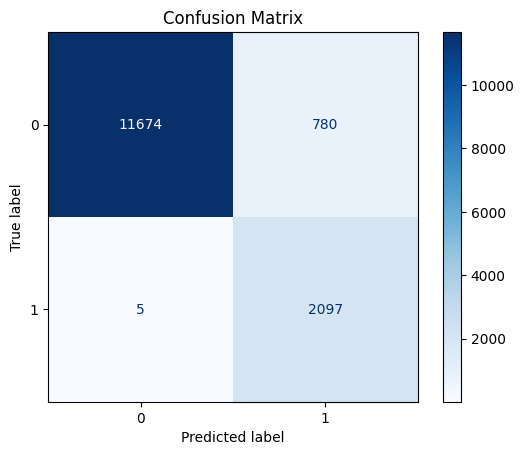

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [56]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12454
           1       0.73      1.00      0.84      2102

    accuracy                           0.95     14556
   macro avg       0.86      0.97      0.90     14556
weighted avg       0.96      0.95      0.95     14556



In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

param_grid = {
    'svm__C': [0.1, 1, 10, 100],           
    'svm__kernel': ['linear', 'rbf', 'poly'], 
    'svm__gamma': ['scale', 'auto', 0.1, 1],
    'svm__degree': [2, 3, 4],                 
    'svm__coef0': [0, 0.5, 1]     
}

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(class_weight='balanced'))  
])

# Initialize GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='f1',       
    verbose=1,                 # Prints progress
    n_jobs=-1                  # Uses all CPU cores
)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [ ]:
print("Best parameters:", grid.best_params_)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])